In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

df = X[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


df


AttributeError: 'Index' object has no attribute '_format_flat'

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  
0                                 10  
1                                  9  
2                                  5  
3                                  5  
4                                  5  
..                               

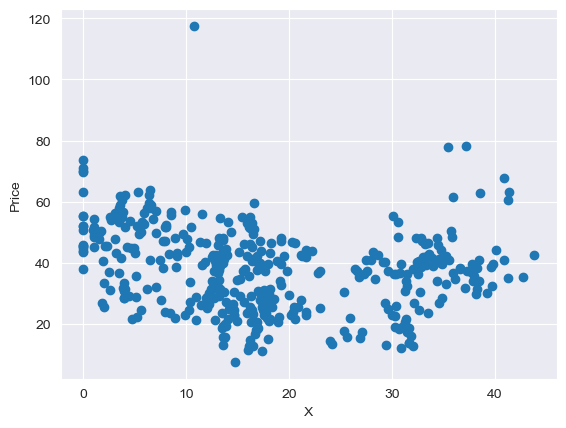

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Ensure df and df2 have the same number of rows
if len(X) == len(y):
    plt.scatter(df['X2 house age'], y.iloc[:, 0])  # Assuming you want to plot the first column of each DataFrame
    plt.xlabel('X')
    plt.ylabel('Price')
    plt.show()
else:
    print("Error: df and df2 do not have the same number of rows.")

In [130]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
b0 = model.intercept_ # note the underscore!
b1 = model.coef_[0] # returns a list containing a single element
print(b0, b1)

[38.39154079] [-2.92260609 -6.68647277  3.67870965]


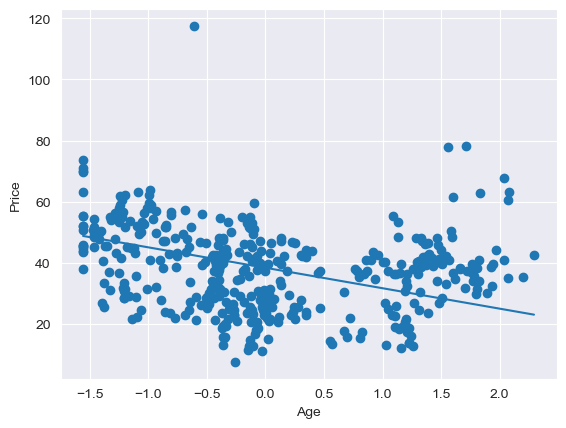

In [131]:
import numpy as np

xs = np.linspace(scaled['X2 house age'].min(), scaled['X2 house age'].max(), len(scaled))
ys = b0 + b1[1] * xs
plt.plot(xs, ys)
plt.scatter(scaled['X2 house age'],y)
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

In [132]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(scaled)

print("Mean absolute error: %.2f" % mean_absolute_error(y, preds))

Mean absolute error: 6.55


C:\Users\joelp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


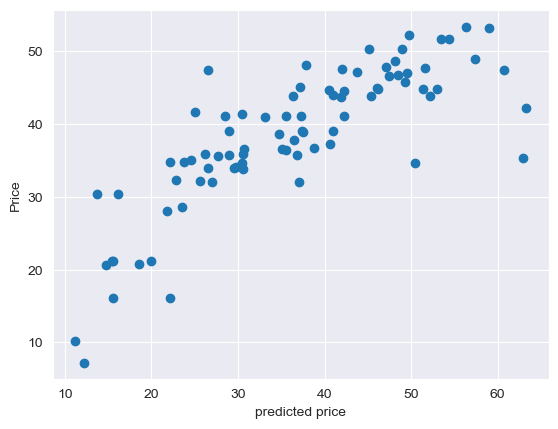

In [133]:
plt.scatter(y_test, y_pred)

plt.xlabel('predicted price')
plt.ylabel('Price')
plt.show()

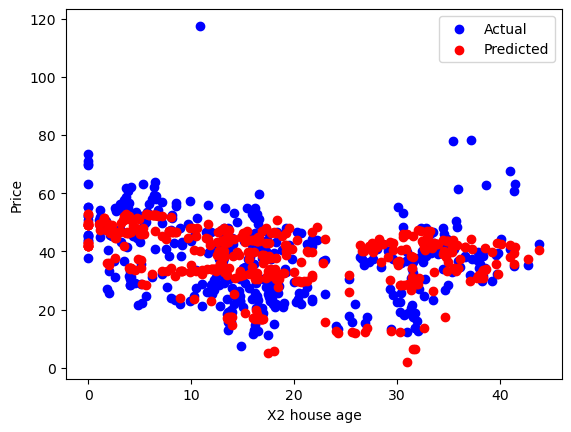

In [122]:



plt.scatter(df['X2 house age'], y, color='blue', label='Actual')
plt.scatter(df['X2 house age'], preds, color='red', label='Predicted')
plt.xlabel('X2 house age')
plt.ylabel('Price')
plt.legend()
plt.show()